# Profile Input Data

Real data are not always clean and structured, thus before any analysis of the data, it is important to firstly develop a thorough understanding of the input data. It is very convenient to have a quick look at the data before more structured analyses or do ad-hoc profiling of the data with SMV. 

* <a href=#bookmark1>The Basics</a>
* <a href=#bookmark2>Extended Data Dictionary</a>
* <a href=#bookmark3>Detailed Distribution Check</a>
* <a href=#bookmark4>Primary Key</a>

**Important Note**  
Please make sure `smv-jupyter` is run at the **root directory of the project** (for example MyApp) before continuing on the tutorial below.

In [1]:
# Import necessary packages
import smv
import pandas as pd
from pyspark.sql import HiveContext, DataFrame

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read the input data from a csv file
raw = openCsv("data/input/employment/CB1200CZ11.csv")

Please note that for users that are running in the environment with hdfs, spark will read data from hdfs by default. In order to read local data, users need to specify `"file://"` before the full path of the data.   
For example `raw = openCsv("file:///home/username/MyApp/data/input/employment/CB1200CZ11.csv")`

----
<a name='bookmark1'/>
### The Basics 

When there is a piece of input data, the immediate question could be one of the following:
1. What kind of fields do we have?
2. What are each column's values?
3. how many records do we have?

Smv offers easy functionalities to quickly view the names and types of an input data, as well as to run basic statistics of the data.

In [3]:
# view the name and data type of each field
raw.printSchema()

root
 |-- ST: string (nullable = true)
 |-- ZIPCODE: string (nullable = true)
 |-- GEO_ID: string (nullable = true)
 |-- GEO_TTL: string (nullable = true)
 |-- FOOTID_GEO: string (nullable = true)
 |-- NAICS2012: integer (nullable = true)
 |-- NAICS2012_TTL: string (nullable = true)
 |-- FOOTID_NAICS: string (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- ESTAB: integer (nullable = true)
 |-- ESTAB_F: string (nullable = true)
 |-- EMP: integer (nullable = true)
 |-- EMP_F: string (nullable = true)
 |-- EMP_N: integer (nullable = true)
 |-- EMP_N_F: string (nullable = true)
 |-- PAYQTR1: integer (nullable = true)
 |-- PAYQTR1_F: string (nullable = true)
 |-- PAYQTR1_N: integer (nullable = true)
 |-- PAYQTR1_N_F: string (nullable = true)
 |-- PAYANN: integer (nullable = true)
 |-- PAYANN_F: string (nullable = true)
 |-- PAYANN_N: integer (nullable = true)
 |-- PAYANN_N_F: string (nullable = true)



In [4]:
# view the schema and the first row
raw.peek()

ST:String            = 01
ZIPCODE:String       = 35004
GEO_ID:String        = 8610000US35004
GEO_TTL:String       = 35004(MOODY,AL)
FOOTID_GEO:String    = null
NAICS2012:Integer    = 0
NAICS2012_TTL:String = Total for all sectors
FOOTID_NAICS:String  = null
YEAR:String          = 2012
ESTAB:Integer        = 167
ESTAB_F:String       = null
EMP:Integer          = 2574
EMP_F:String         = null
EMP_N:Integer        = 0
EMP_N_F:String       = H
PAYQTR1:Integer      = 19448
PAYQTR1_F:String     = null
PAYQTR1_N:Integer    = 0
PAYQTR1_N_F:String   = H
PAYANN:Integer       = 83803
PAYANN_F:String      = null
PAYANN_N:Integer     = 0
PAYANN_N_F:String    = H


In [5]:
# look at the first n rows of the data with show() function
raw.show(5)

+---+-------+--------------+--------------------+----------+---------+--------------------+------------+----+-----+-------+-----+-----+-----+-------+-------+---------+---------+-----------+------+--------+--------+----------+
| ST|ZIPCODE|        GEO_ID|             GEO_TTL|FOOTID_GEO|NAICS2012|       NAICS2012_TTL|FOOTID_NAICS|YEAR|ESTAB|ESTAB_F|  EMP|EMP_F|EMP_N|EMP_N_F|PAYQTR1|PAYQTR1_F|PAYQTR1_N|PAYQTR1_N_F|PAYANN|PAYANN_F|PAYANN_N|PAYANN_N_F|
+---+-------+--------------+--------------------+----------+---------+--------------------+------------+----+-----+-------+-----+-----+-----+-------+-------+---------+---------+-----------+------+--------+--------+----------+
| 01|  35004|8610000US35004|     35004(MOODY,AL)|      null|        0|Total for all sec...|        null|2012|  167|   null| 2574| null|    0|      H|  19448|     null|        0|          H| 83803|    null|       0|         H|
| 01|  35005|8610000US35005|35005(ADAMSVILLE,AL)|      null|        0|Total for all sec...|     

In [6]:
# Use self-defined function to view the first n rows of the data shown as a structued table
DataFrame.smvPdHead = lambda df, n: df.toPandas().head(n)

`pandas.DataFrame.head(n)` will return the first n rows of a dataset in a structured table. The default maximal number of columns to display is 20, and maximal number of rows to display is 60. Users can set the display options as below to change of the # of columns or rows to display. There are also other display options like output precision for users to customize, for more details please refer to [this doc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html)

In [7]:
pd.set_option("display.max_columns", 30) # as we have more than 20 columns and we would like to view them all
pd.set_option("display.max_rows", 30)

In [8]:
raw.smvPdHead(5)

,ST,ZIPCODE,GEO_ID,GEO_TTL,FOOTID_GEO,NAICS2012,NAICS2012_TTL,FOOTID_NAICS,YEAR,ESTAB,ESTAB_F,EMP,EMP_F,EMP_N,EMP_N_F,PAYQTR1,PAYQTR1_F,PAYQTR1_N,PAYQTR1_N_F,PAYANN,PAYANN_F,PAYANN_N,PAYANN_N_F
0,01,35004,8610000US35004,"35004(MOODY,AL)",None,0,Total for all sectors,None,2012,167,None,2574,None,0,H,19448,None,0,H,83803,None,0,H
1,01,35005,8610000US35005,"35005(ADAMSVILLE,AL)",None,0,Total for all sectors,None,2012,88,None,665,None,0,G,3948,None,0,G,16299,None,0,G
2,01,35006,8610000US35006,"35006(ADGER,AL)",None,0,Total for all sectors,None,2012,20,None,0,g,0,D,0,D,0,D,0,D,0,D
3,01,35007,8610000US35007,"35007(ALABASTER,AL)",None,0,Total for all sectors,None,2012,596,None,10347,None,0,H,82101,None,0,H,343200,None,0,H
4,01,35010,8610000US35010,"35010(ALEXANDER CITY,AL)",None,0,Total for all sectors,None,2012,463,None,6725,None,0,G,46164,None,0,G,196231,None,0,G


In [9]:
# get the number of records
raw.count()

38818

----
<a name='bookmark2'/>
### Extended Data Dictionary (EDD)

Apart from the name / data type of each field and total number of records, some basic statistics of certain fields quickly may also be important for the following analyses. Smv provides the `smvEdd` method as a quick summary of basic statistics for different types of variables. One may choose to use `smvEdd` on all or selected columns.

In [10]:
raw.smvEdd("ST", "YEAR", "EMP")
# raw.smvEdd() will simply return EDD results for all columns

ST                   Non-Null Count         38818
ST                   Null Count             0
ST                   Min Length             2
ST                   Max Length             2
ST                   Approx Distinct Count  52
YEAR                 Non-Null Count         38818
YEAR                 Null Count             0
YEAR                 Min Length             4
YEAR                 Max Length             4
YEAR                 Approx Distinct Count  1
EMP                  Non-Null Count         38818
EMP                  Null Count             0
EMP                  Average                2907.469241073729
EMP                  Standard Deviation     15393.485966796263
EMP                  Min                    0.0
EMP                  Max                    2733406.0


From the EDD, not only can we get a sense of the general value distribution of the columns, but we can also validate the input data. For example, from the results we have validated that all data in this input file are for 2012 as there is only one distinct value.

EDD needs to scan full data, thus sometimes it is not efficient and could be risky to run EDD on full data, especially when we face a large data size or we would like to run EDD on all columns to get distributions in one operation. One suggested way is to take a **random sample** of the input data. Given the distributions of most columns on a randomly sampled data will generally be very similar to those on the full data, so usually running EDD on a random sample can serve our purpose to quickly check the input data well.

Simply run the `sample(withReplacement, fraction, seed=None)` to randomly take x% of total records.

In [11]:
raw_sample = raw.sample(False, 0.1, 99).cache() # random sample 10% records from input data
raw_sample.count()

3929

Note that `raw_sample = raw.sample(False, 0.1, 99)` only defines the logic of sampling and does not actually generate the concrete data, we need to use `cache` to make the sample data cached such that in the following operations that call the `raw_sample`, the cached data will be used. Without using `cache`, when we run the command `raw_sample.count()` below, it will firstly run `raw_sample = raw.sample(False, 0.1, 99)` again and then run `count`, which is not efficient and may be risky if the size of the full data is very large.

After generating a sample data, we can run EDD on the columns that we are interested in or all columns.

In [12]:
raw_sample.smvEdd("ST", "YEAR", "ESTAB", "EMP", "PAYANN")

ESTAB                Non-Null Count         3929
ESTAB                Null Count             0
ESTAB                Average                191.3840671926699
ESTAB                Standard Deviation     365.86453059306115
ESTAB                Min                    1.0
ESTAB                Max                    5933.0
YEAR                 Non-Null Count         3929
YEAR                 Null Count             0
YEAR                 Min Length             4
YEAR                 Max Length             4
YEAR                 Approx Distinct Count  1
ST                   Non-Null Count         3929
ST                   Null Count             0
ST                   Min Length             2
ST                   Max Length             2
ST                   Approx Distinct Count  51
PAYANN               Non-Null Count         3929
PAYANN               Null Count             0
PAYANN               Average                129534.93789768389
PAYANN               Standard Deviation     389923.74256

----
<a name='bookmark3'/>
### Detailed Distribution Check

After looking at the basic statistics of many columns, based on the business problem we may want to understand the distribution of certain variables in a more detailed manner, like the value frequency for categorical values or value distribution for numerical variables.

Smv offers various functions to check distribution. For example, `smvHist` is a pretty convenient function which can detect data types, and run frequency distribution for categorical variables and binned distribution for numerical variables together. Same as `smvEdd`, one can choose to run `smvHist` on all or select columns based on business requirement.

#### Check one column
For example, we can look at the value distribution of # of establishments like below:

In [13]:
raw.smvHist("ESTAB")

Histogram of ESTAB: with BIN size 100.0
key                      count      Pct    cumCount   cumPct
0.0                      26060   67.13%       26060   67.13%
100.0                     3129    8.06%       29189   75.19%
200.0                     1960    5.05%       31149   80.24%
300.0                     1445    3.72%       32594   83.97%
400.0                     1136    2.93%       33730   86.89%
500.0                      937    2.41%       34667   89.31%
600.0                      820    2.11%       35487   91.42%
700.0                      616    1.59%       36103   93.01%
800.0                      552    1.42%       36655   94.43%
900.0                      422    1.09%       37077   95.51%
1000.0                     338    0.87%       37415   96.39%
1100.0                     314    0.81%       37729   97.19%
1200.0                     230    0.59%       37959   97.79%
1300.0                     173    0.45%       38132   98.23%
1400.0                     139    0.36%      

From this histogram summary, we can see that about 67% of the records has # of establishments < 100. As you can see the bin size is set as 100 in `smvHist`, what if we would like to define the bin size by ourselves to view data in a more or less granular way? `smvBinHist` offers the flexibility to define the bin size.

In [14]:
raw.smvBinHist(("ESTAB", 80))

Histogram of ESTAB: with BIN size 80.0
key                      count      Pct    cumCount   cumPct
0.0                      24954   64.28%       24954   64.28%
80.0                      3264    8.41%       28218   72.69%
160.0                     1848    4.76%       30066   77.45%
240.0                     1391    3.58%       31457   81.04%
320.0                     1137    2.93%       32594   83.97%
400.0                      923    2.38%       33517   86.34%
480.0                      804    2.07%       34321   88.42%
560.0                      680    1.75%       35001   90.17%
640.0                      619    1.59%       35620   91.76%
720.0                      483    1.24%       36103   93.01%
800.0                      465    1.20%       36568   94.20%
880.0                      355    0.91%       36923   95.12%
960.0                      319    0.82%       37242   95.94%
1040.0                     241    0.62%       37483   96.56%
1120.0                     246    0.63%       

Additionally, if we would like to visualize the distribution to help understand the data better, we can easily define some functions in python context to realize that.

In [15]:
# Use self-defined functions to visualize distribution
DataFrame.smvPdFreqHist = lambda df,col: df.toPandas()[col].value_counts().plot(kind='bar')
DataFrame.smvPdHist = lambda df,col,n: df.toPandas()[col].hist(bins=n, alpha=0.3, color='k')

Given `toPandas` will load data in memory, it is of risk to directly use the full data. It is suggested to use the sample data to be converted into pandas dataframe for visualization.

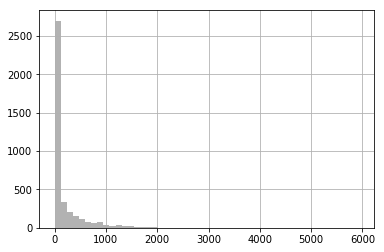

In [16]:
raw_sample.smvPdHist("ESTAB",50)

#### Cross check between columns    
Certain variables are related to each other per business meaning, and it is also necessary to do some cross checks upon multiple columns. 

For instance, for certain counties employee count data are suppressed, where the value in "EMP" column is 0. The data suppression flag is "EMP_F", with categorical values to only denote the employment size range.

|flag in EMP_F|employee size range|
|---|---|
|a	|0 to 19 employees |
|b	|20 to 99 employees |
|c	|100 to 249 employees |
|e	|250 to 499 employees |
|f	|500 to 999 employees |
|g	|1,000 to 2,499 employees |
|h	|2,500 to 4,999 employees |
|i	|5,000 to 9,999 employees |
|j	|10,000 to 24,999 employees |
|l	|50,000 to 99,999 employees |
|k	|25,000 to 49,999 employees |
|m	|100,000 employees or more |

Example records are as below:

In [17]:
raw.select("ST", "GEO_TTL", "EMP", "EMP_F").smvPdHead(10)

,ST,GEO_TTL,EMP,EMP_F
0,01,"35004(MOODY,AL)",2574,None
1,01,"35005(ADAMSVILLE,AL)",665,None
2,01,"35006(ADGER,AL)",0,g
3,01,"35007(ALABASTER,AL)",10347,None
4,01,"35010(ALEXANDER CITY,AL)",6725,None
5,01,"35011(ALEXANDER CITY,AL)",0,f
6,01,"35013(ALLGOOD,AL)",0,b
7,01,"35014(ALPINE,AL)",106,None
8,01,"35015(ALTON,AL)",0,b
9,01,"35016(ARAB,AL)",3306,None


Similar data suppressions also exist for establishment and payroll, we can cross check the 3 data suppresion flags ("EMP_F", "ESTAB_F" and "PAYANN_F") to see whether suppressions happen on the same county for all three stats or not. We can use `smvConcatHist` to check joint distribution of these 3 categorical variables.

In [18]:
raw.select(
    "ESTAB_F",
    "PAYANN_F",
    when(col("EMP_F").isNotNull(), "S").alias("EMP_F_ind")  #define an indicator as there are too many values in "EMP_F"
).smvConcatHist("ESTAB_F", "EMP_F_ind", "PAYANN_F")

Histogram of ESTAB_F_EMP_F_ind_PAYANN_F: String sort by Key
key                      count      Pct    cumCount   cumPct
null                     29639   76.35%       29639   76.35%
_S_                       2090    5.38%       31729   81.74%
_S_D                      7089   18.26%       38818  100.00%
-------------------------------------------------


This shows:
- no data suppresion for establishments, as all values in "ESTAB_F" are null
- More than 76% records have no data suppressions
- ~5% records have only employment data suppressed
- ~18% records have both employment and payroll data suppressed

----
<a name='bookmark4'/>
### Primary Key

Before proceeding to any kind of detailed analysis, we must know the level of the data. Essentially we need to understand what each record represents: for example does each record represent census numbers for one state or one zip code? A **primary key** or a set of primary keys can uniquely identify one record of the data. To understand the level of the data, we will either find out the primary keys or validate the primary keys stated in the available input data document.

Use `smvDiscoverPK` method to find the column combinations that can uniquely identify a row of data. 

In [19]:
# run on 5000 records to identify PK
raw.smvDiscoverPK(5000)

[ZIPCODE], 5000


"ZIPCODE" is identified as the primary key for the data. `smvDiscoverPK` finds one combination of columns to uniquely identify one record, there could be other columns combinations.

One can also choose to validate the primary key if the information is stated in relevant data document. From census information and the peek of data, each record represents summary statistics for each county (ZIPCODE). We can validate this by deduping by key "ZIPCODE" and see whether the total # of records change. Given running dedup on large data set can be of high cost, we can run on sample data or first n rows similar to the `smvDiscoverPK` method. 

In [20]:
raw_sample.count()

3929

In [21]:
raw_sample.smvDedupByKey("ZIPCODE").count()

3929

The total # of records remains the same, which suggests "ZIPCODE" can uniquely identify one record of the data.